# Trabalho 1 - Variáveis Aleatórias e Processos Estocásticos
- Preparação do ambiente

In [46]:
import numpy as np
from scipy.io import wavfile
from scipy.stats import skew, kurtosis
from IPython.display import Audio
import matplotlib.pyplot as plt


## Questão 01: 
Carregue o arquivo de áudio fornecido audioA.wav. Este sinal possui 2 canais (audio estéreo).
Você deve usar apenas o primeiro dos 2 canais. Gere o gráfico deste sinal de áudio e seu histograma
com 80 barras.

In [47]:
#Lendo o arquivo de auido
sample_rate, data = wavfile.read('audioA.wav')
audio = data[:,0] #Pegando apenas um audio mono

Audio(data=data[:,0], rate=sample_rate)

Text(0, 0.5, 'Frequência relativa')

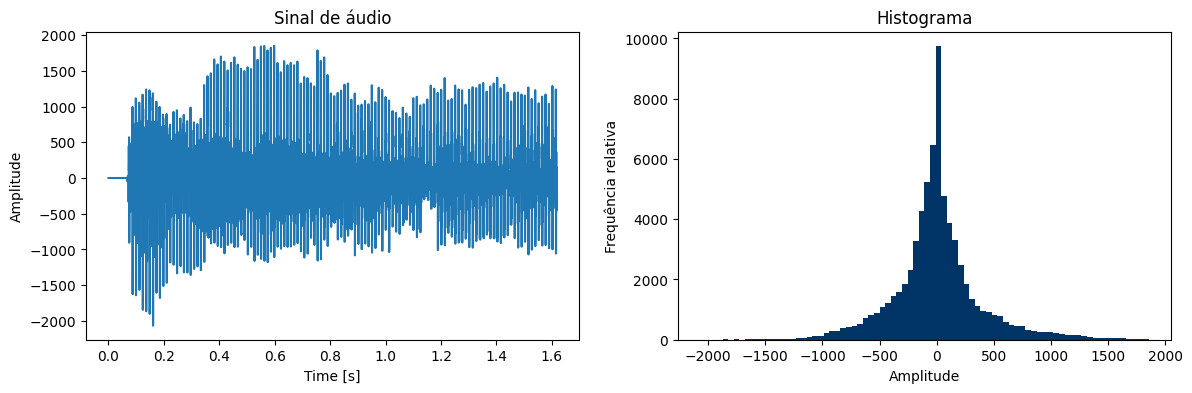

In [102]:
#Transformando amostra -> tempo

time = np.arange(len(audio))/sample_rate

#Criando a figura e os eixos
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

#Plotando o gráfico do sinal de áudio
axs[0].plot(time, audio)

#Estilização
axs[0].set_title("Sinal de áudio")
axs[0].set_xlabel("Time [s]")
axs[0].set_ylabel("Amplitude")

#Plotando o histograma
axs[1].hist(audio, bins=80, color='#003366')

#Estilização
axs[1].set_title("Histograma")
axs[1].set_xlabel("Amplitude")
axs[1].set_ylabel("Frequência relativa")



## Questão 02:
Calcule a assimetria e a curtose do sinal. Estes valores eram esperados? Justifique sua resposta
em forma de comentário logo abaixo desta questão.

In [ ]:
assimetria = skew(audio)
curtose = kurtosis(audio)

print(f"Assimetria: {assimetria} \n Curtose: {curtose}")

Assimetria: 0.4312721153267144 
 Kurtose: 2.998345446907682


### Resposta:

Os valores de assimetria ($skewness=0.43127$) e curtose ($kurtosis=2.99834$) são esperados se analisarmos o histograma do audio em questão. 
A assimetria é proxima de 0 que indica um relativo grau de simetria. Porém, como possui um valor maior que zero, o histograma posssui uma leve calda a direita.
A curtose do audio é proxima de 3, que indica a concentração de amostras proximo a média (assim como podemos observar no histograma).
De forma geral, tanto a curtose quanto a assimetria do nosso sinal se aproximam dos valores clássicos de uma distribuição normal, assim como o histograma nos mostra.

## Questão 03:
Divida o sinal ruidoso em 10 partes com aproximadamente 7.100 amostras cada parte. Em
seguida, calcule a média temporal de cada uma destas partes. A média é aproximadamente constante
ou varia com o tempo? Coloque a resposta em forma de comentário logo abaixo desta questão.


Média parte 0: -0.9882270497547302
Média parte 1: 0.3101611772950245
Média parte 2: -2.194113524877365
Média parte 3: 4.537070777855641
Média parte 4: -2.376313945339874
Média parte 5: -5.982200420462509
Média parte 6: 3.7632796075683252
Média parte 7: 21.088730025231285
Média parte 8: 2.4380431735351835
Média parte 9: -1.2022708158116064


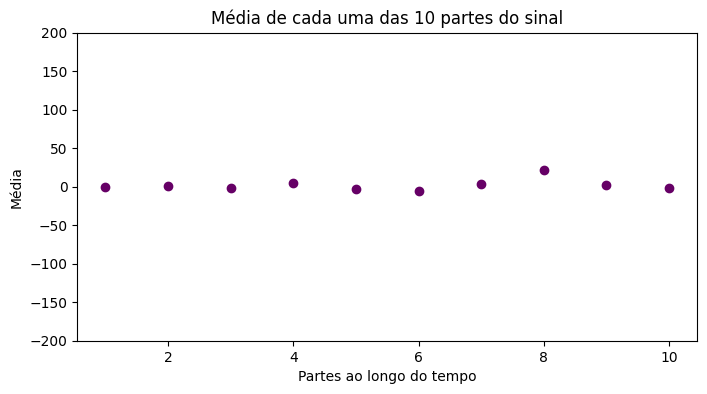

In [ ]:
partitioned_signal = np.array_split(audio, 10)
medias = [np.mean(partition) for partition in partitioned_signal]

for i, media in enumerate(medias):
    print(f"Média parte {i}: {media}")

#Plotando as médias
plt.figure(figsize=(8, 4))
plt.scatter(range(1, 11), medias, color="#660066")

#Estilização
plt.title("Média de cada uma das 10 partes do sinal")
plt.xlabel("Partes ao longo do tempo")
plt.ylabel("Média")
plt.ylim(-200, 200)

plt.show()

### Resposta:
A média varia um pouco ao longo das amostras, mas na prática é como se ela fosse praticamente constante. Tanto que se calcularmos a média do audio inteiro e a média das fatias o valor é muito próximo. Irei fazer isso na célula a seguir:

In [ ]:
print(f"Média amostral do audio: {np.mean(audio)}")
print(f"Média das médias do audio particionado: {np.mean(medias)}")

Média amostral do audio: 1.939184548754678
Média das médias do audio particionado: 1.939415900523938


## Questão 04:
Ainda usando a divisão do sinal em 10 partes com 7.100 amostras cada, calcule a função de autocorrelação de cada uma das partes do sinal, usando 20 valores de atraso. A função de autocorrelação é aproximadamente a mesma para todas as partes? Coloque a resposta em forma de comentário logo
abaixo desta questão.

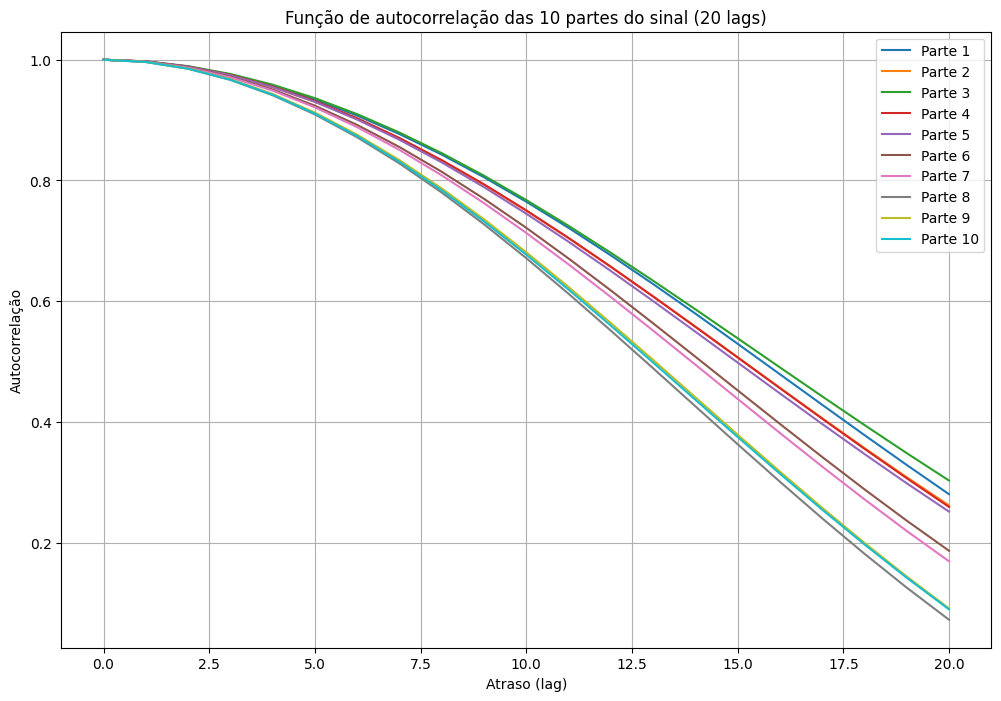

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular autocorrelação normalizada
def autocorrelacao(x, max_lag=20):
    n = len(x)
    x = x - np.mean(x)
    result = np.correlate(x, x, mode='full')
    autocorr = result[n-1:n+max_lag]  
    
    #Normalização:
    autocorr /= autocorr[0] 
    return autocorr

partitioned_signal = np.array_split(audio, 10)
max_lag = 20

plt.figure(figsize=(12, 8))

for i, part in enumerate(partitioned_signal):
    ac = autocorrelacao(part, max_lag)
    plt.plot(range(max_lag + 1), ac, label=f'Parte {i+1}')

plt.title('Função de autocorrelação das 10 partes do sinal (20 lags)')
plt.xlabel('Atraso (lag)')
plt.ylabel('Autocorrelação')
plt.legend()
plt.grid(True)
plt.show()

### Resposta
A autocorreção é praticamente a mesma em todas as partições. Quanto maior o lag, menos autocorrelatas as partições são.

## Questão 05:
Com base nas questões 3 e 4, você considera que o sinal é estacionário no sentido amplo? Coloque
a resposta em forma de comentário logo abaixo desta questão.

### Resposta:
Para um processo ser estacionário no sentido amplo (ou estacionário em média e covariância), a média deve ser constante e
a função de autocovariância depende somente do lag (atraso), não do tempo absoluto.

Dessa forma, sim, eu considerero que o sinal do audio é estacionário no sentido amplo, já que a média foi relativamente constante (independende do tempo, ou, no caso, das partições) e a variancia dependeu apenas do atraso entre dois instantes de tempo. 